In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
DF= pd.read_csv('Fraud.csv')
DF

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
DF.shape

(6362620, 11)

### Null Values

In [4]:
# checking null values in dataset
DF.isnull().sum()
# provides count of null values of all the columns

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:

DF.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
DF.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

### Outliers

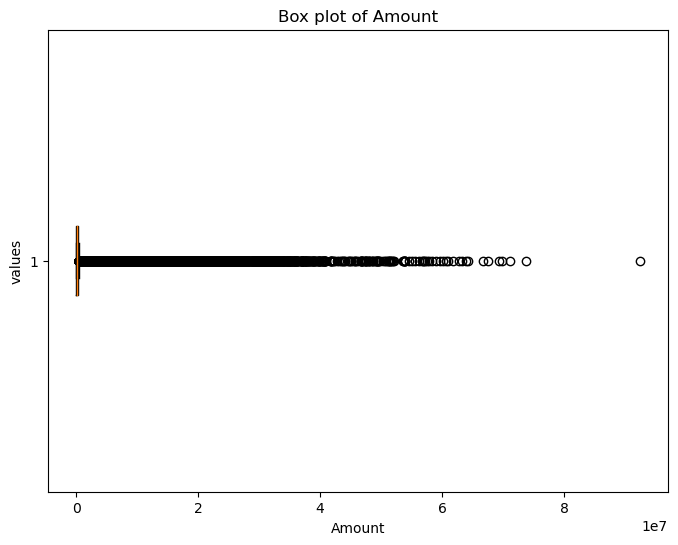

In [8]:
# checking outliers
plt.figure(figsize=(8,6))
plt.boxplot(DF['amount'],vert=False)

plt.xlabel('Amount')
plt.ylabel('values')
plt.title('Box plot of Amount')

plt.show()

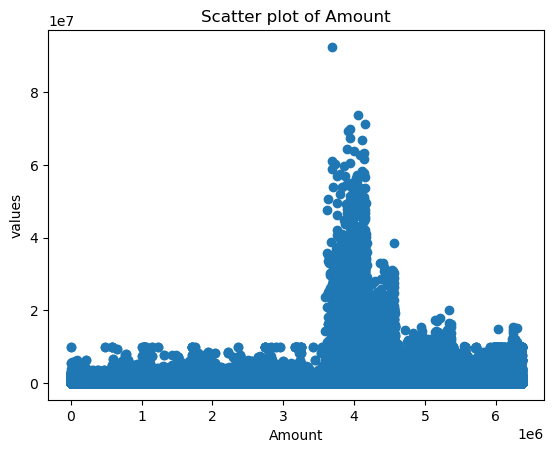

In [9]:
#scatter plot of amount for better visualization
plt.scatter(DF.index, DF['amount'])
plt.xlabel('Amount')
plt.ylabel('values')
plt.title('Scatter plot of Amount')

plt.show()

In [10]:
# Finding outliers using IQR method
Q1 = DF['amount'].quantile(0.25)
Q3 = DF['amount'].quantile(0.75)
IQR =Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = DF[(DF['amount'] < lower_bound) | (DF['amount']> upper_bound)]
print("Outliers = ")
print(outliers)

Outliers = 
         step      type      amount     nameOrig  oldbalanceOrg  \
85          1  TRANSFER  1505626.01   C926859124           0.00   
86          1  TRANSFER   554026.99  C1603696865           0.00   
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
93          1  TRANSFER   583848.46  C1839168128           0.00   
...       ...       ...         ...          ...            ...   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
85                  0.0   C665576141        29031.00      5515763.34        0   
86                  0

In [11]:
outliers.shape

(338078, 11)

In [12]:
print(len(outliers[outliers.isFraud ==1]))

3854


In [13]:
legit = len(DF[DF.isFraud == 0])
fraud = len(DF[DF.isFraud == 1])
legit_percent = (legit / (fraud +legit)) *100
fraud_percent = (fraud / (fraud +legit)) *100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ",fraud)
print("Percentage of legit transactions: {: .4f} % ".format(legit_percent))
print("Percentage of fraud transactions: {: .4f} %".format(fraud_percent))



Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of legit transactions:  99.8709 % 
Percentage of fraud transactions:  0.1291 %


In [14]:
DF.loc[(DF['amount'] < lower_bound) | (DF['amount']> upper_bound)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0,0
93,1,TRANSFER,583848.46,C1839168128,0.00,0.0,C1286084959,667778.00,2107778.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [15]:
#trimming: deleting outliers
newdf = DF.loc[(DF['amount'] > lower_bound) & (DF['amount']< upper_bound)]
print("Length before removing outliers: ", len(DF))
print("Length after removing outliers: ", len(newdf))
print("ourliers: ", len(DF)-len(newdf))


Length before removing outliers:  6362620
Length after removing outliers:  6024542
ourliers:  338078


<Axes: >

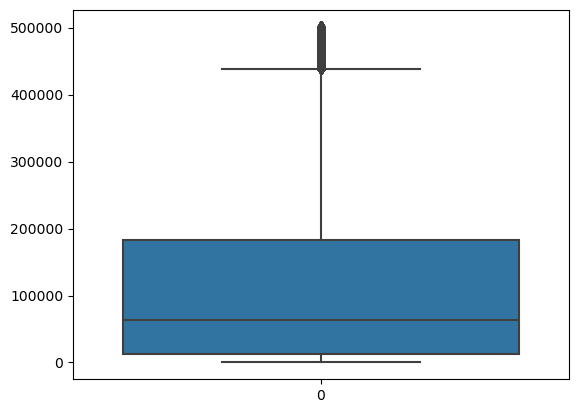

In [16]:
sns.boxplot(newdf['amount'])

## Visualization

([<matplotlib.patches.Wedge at 0x1911ffbc8d0>,
 [Text(-1.0999971582342292, 0.002500375295864727, ''),
  Text(1.0999971582319432, -0.0025003763016178755, '')],
 [Text(-0.5999984499459431, 0.001363841070471669, '99.9276%'),
  Text(0.5999984499446962, -0.0013638416190642955, '0.0724%')])

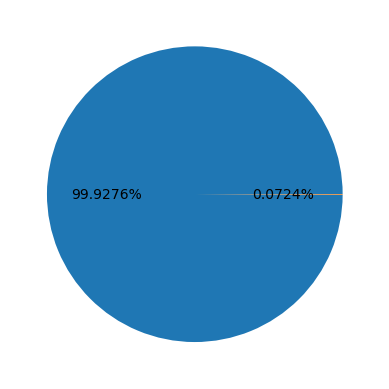

In [17]:
plt.pie(newdf['isFraud'].value_counts(), autopct='%.4f%%')

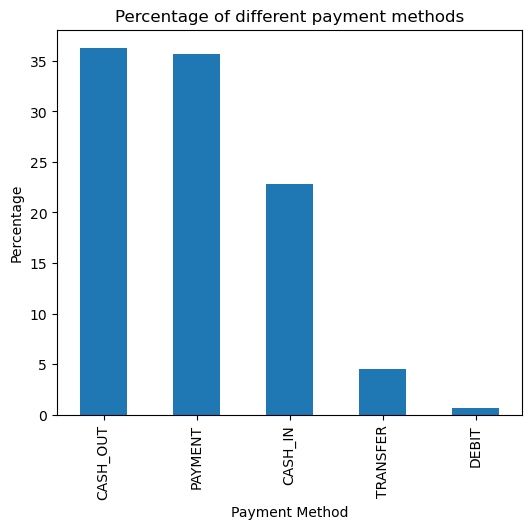

In [18]:
payment_counts = newdf['type'].value_counts()
payment_percentage = (payment_counts/ payment_counts.sum())*100

plt.figure(figsize=(6,5))
payment_percentage.plot(kind='bar')

plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.title('Percentage of different payment methods')

plt.show()

type
CASH_OUT    2197
TRANSFER    2162
Name: count, dtype: int64


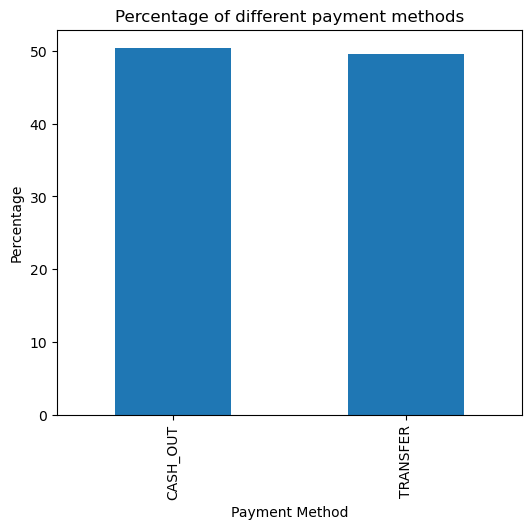

In [19]:
fraud_df = newdf[newdf['isFraud']==1]
legit_df = newdf[newdf['isFraud']==0]

payment_counts_fraud = fraud_df['type'].value_counts()
payment_percentage_fraud = (payment_counts_fraud/ payment_counts_fraud.sum())*100

print(payment_counts_fraud)
plt.figure(figsize=(6,5))
payment_percentage_fraud.plot(kind='bar')

plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.title('Percentage of different payment methods')

plt.show()

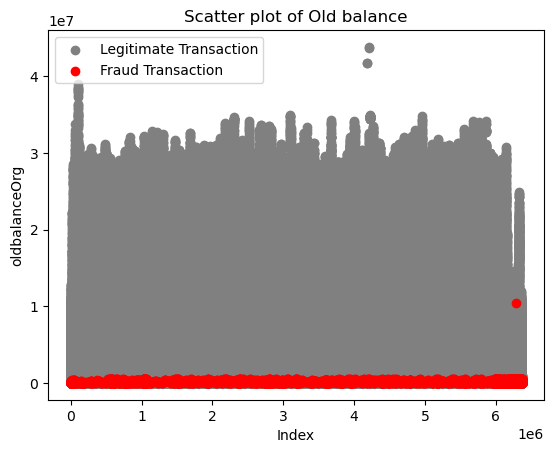

In [20]:
# Determing Relation between oldbalanceOrg and Fraud Transactions

plt.scatter(legit_df.index,legit_df['oldbalanceOrg'],color= 'grey',label='Legitimate Transaction')
plt.scatter(fraud_df.index,fraud_df['oldbalanceOrg'],color= 'red',label='Fraud Transaction')

plt.xlabel('Index')
plt.ylabel('oldbalanceOrg')
plt.title('Scatter plot of Old balance')

plt.legend()
plt.show()

C:\Users\Rahul\Downloads\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


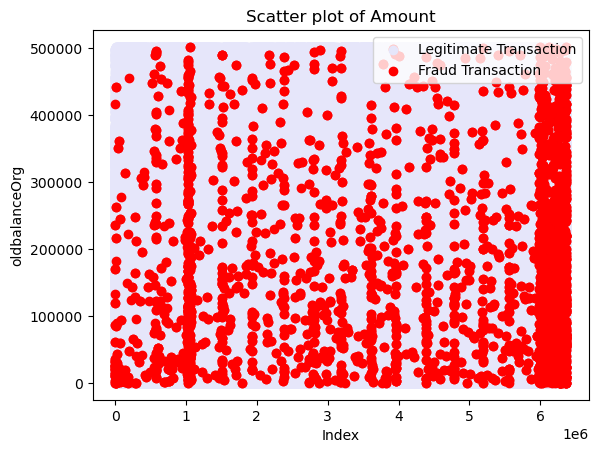

In [21]:
# Determing Relation between amount and Fraud Transactions

plt.scatter(legit_df.index,legit_df['amount'],color= 'lavender',label='Legitimate Transaction')
plt.scatter(fraud_df.index,fraud_df['amount'],color= 'red',label='Fraud Transaction')

plt.xlabel('Index')
plt.ylabel('oldbalanceOrg')
plt.title('Scatter plot of Amount')

plt.legend()
plt.show()

## Problem Solving

In [22]:
NDF= newdf.copy()
NDF.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [23]:
OBJ = NDF.select_dtypes(include='object').columns
print(OBJ)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


## Label Encoding

In [24]:
# Numeric conversion of object datatypes using Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in OBJ:
    NDF[i]= label_encoder.fit_transform(NDF[i].astype(str))
print(NDF.info())
NDF.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6024542 entries, 0 to 6362615
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 482.6 MB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,718183,170136.0,160296.36,1655970,0.0,0.0,0,0
1,1,3,1864.28,2073190,21249.0,19384.72,1727800,0.0,0.0,0,0
2,1,4,181.00,949403,181.0,0.00,434981,0.0,0.0,1,0
3,1,1,181.00,5519337,181.0,0.00,387487,21182.0,0.0,1,0
4,1,3,11668.14,3263423,41554.0,29885.86,822795,0.0,0.0,0,0


## Multicollinearity

<Axes: >

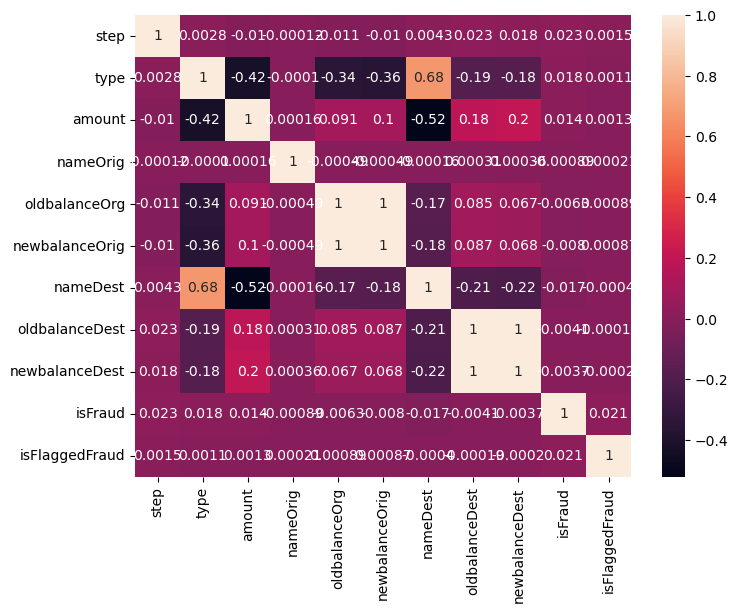

In [25]:
corr =NDF.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)


In [26]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return(vif)
calc_vif(NDF)

,variables,VIF
0,step,3.032109
1,type,5.573731
2,amount,2.604272
3,nameOrig,3.062665
4,oldbalanceOrg,1797.137767
5,newbalanceOrig,1825.269574
6,nameDest,4.408159
7,oldbalanceDest,231.962052
8,newbalanceDest,235.298701
9,isFraud,1.007586


In [27]:
NDF['Amount_orig']=NDF.apply(lambda x: x['oldbalanceOrg'] -x['newbalanceOrig'],axis =1)
NDF['Amount_Dest']=NDF.apply(lambda x: x['newbalanceDest'] -x['oldbalanceDest'],axis =1)
NDF  = NDF.drop(['oldbalanceOrg','newbalanceOrig', 'oldbalanceDest','newbalanceDest','nameOrig','nameDest'], axis=1)
calc_vif(NDF)


,variables,VIF
0,step,2.595593
1,type,2.074454
2,amount,2.176604
3,isFraud,1.006832
4,isFlaggedFraud,1.000460
5,Amount_orig,1.756741
6,Amount_Dest,1.513047


<Axes: >

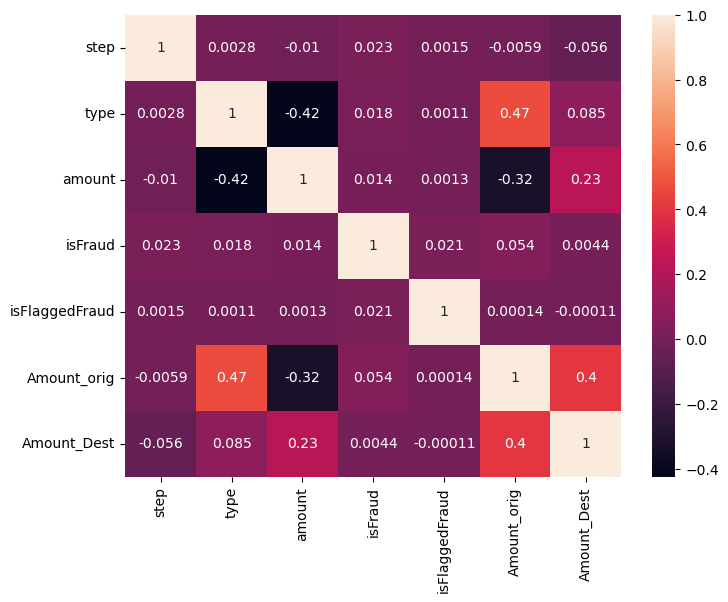

In [28]:
corr =NDF.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)

## Model Building

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics 
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


## Train Test Split

In [30]:
y= NDF['isFraud']
x=NDF.drop(['isFraud'], axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)
print(x_train.shape)
print(x_test.shape)


(4819633, 6)
(1204909, 6)


In [39]:
#Random Forest

random= RandomForestClassifier(n_estimators=100)
random.fit(x_train,y_train)

y_predR =random.predict(x_test)
random_forest_score=random.score(x_test,y_test)*100

In [40]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

log=LogisticRegression(C=0.001, penalty="l2")
log.fit(x_train,y_train)

y_pred= log.predict(x_test)
log_score = log.score(x_test,y_test)*100


C:\Users\Rahul\Downloads\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Decision Tree

decision =DecisionTreeClassifier(max_depth=80, min_samples_split=2, min_samples_leaf=1)
decision.fit(x_train,y_train)

y_pred_d = decision.predict(x_test)
decision_score = decision.score(x_test,y_test)*100


In [42]:
print("Random Forest Score: ", random_forest_score)
print("Logistic Regression Score: ", log_score)
print("Decision Tree Score: ", decision_score)

Random Forest Score:  99.96356571326133
Logistic Regression Score:  99.92082389624444
Decision Tree Score:  99.94630299881568


## Classification Report and Confusion Matrix

#### Random Forest

Classification Report of Random Forest:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1204017
           1       0.93      0.55      0.69       892

    accuracy                           1.00   1204909
   macro avg       0.96      0.78      0.85   1204909
weighted avg       1.00      1.00      1.00   1204909

Confusion Matrix of Random Forest


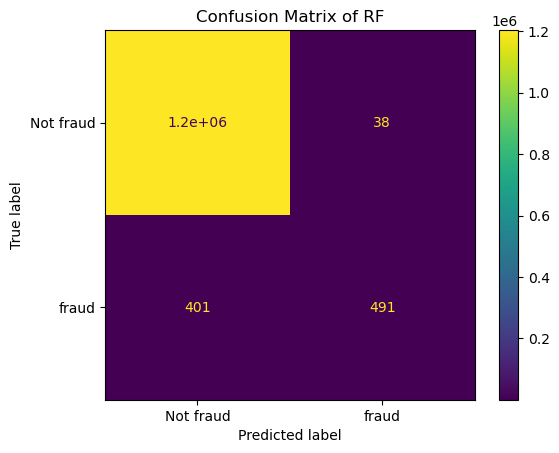

In [45]:
clrf = classification_report(y_test,y_predR)
print("Classification Report of Random Forest: ", clrf)

#confusion matrix
conrf = confusion_matrix(y_test, y_predR.round())
print("Confusion Matrix of Random Forest")
display_labels=['Not fraud','fraud']
matrix = ConfusionMatrixDisplay(confusion_matrix=conrf, display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix of RF")
plt.show()

precision_rf = precision_score(y_test, y_predR)
recallrf= recall_score(y_test, y_predR)

#### Decision Tree

Classification Report of Decision Tree:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1204017
           1       0.64      0.63      0.63       892

    accuracy                           1.00   1204909
   macro avg       0.82      0.81      0.82   1204909
weighted avg       1.00      1.00      1.00   1204909

Confusion Matrix of Decision Tree


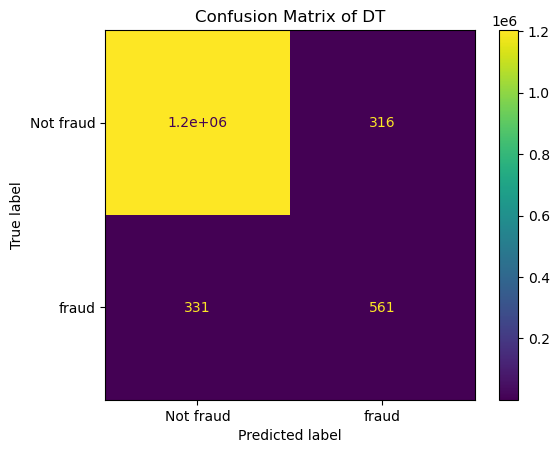

In [46]:
#classification report DT
cldt = classification_report(y_test,y_pred_d)
print("Classification Report of Decision Tree: ", cldt)

#confusion matrix
condt = confusion_matrix(y_test, y_pred_d.round())
print("Confusion Matrix of Decision Tree")
matrix = ConfusionMatrixDisplay(confusion_matrix=condt, display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix of DT")
plt.show()

precision_dt = precision_score(y_test, y_pred_d)
recalldt= recall_score(y_test, y_pred_d)

#### Logistic Regression

Classification Report of Decision Tree:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1204017
           1       0.02      0.00      0.00       892

    accuracy                           1.00   1204909
   macro avg       0.51      0.50      0.50   1204909
weighted avg       1.00      1.00      1.00   1204909

Confusion Matrix of Logistic Regression


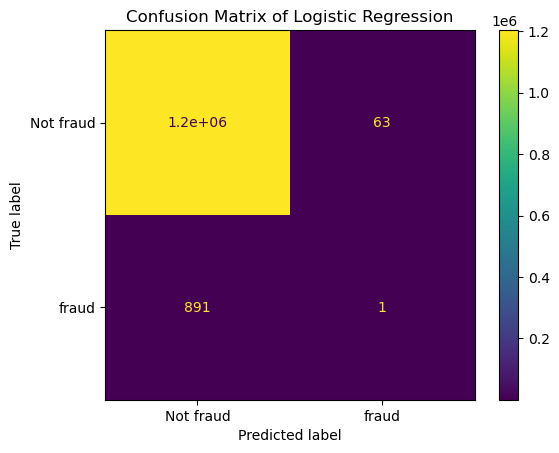

In [47]:
#classification report DT
cllr = classification_report(y_test,y_pred)
print("Classification Report of Decision Tree: ", cllr)

#confusion matrix
conlr = confusion_matrix(y_test, y_pred.round())
print("Confusion Matrix of Logistic Regression")
matrix = ConfusionMatrixDisplay(confusion_matrix=conlr, display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

precision_lr = precision_score(y_test, y_pred)
recalllr= recall_score(y_test, y_pred)

### Comparison

In [49]:
algos = ["Random Forest", "Logistic Regression", "Decision Tree"]
acc= [random_forest_score, log_score, decision_score]
precision =[precision_rf,precision_dt,precision_lr]
recall = [recallrf,recalldt,recalllr]

data= {
    'Algorithm' :algos,
    'Accuracy Score':acc,
    'Precicion Score': precision,
    'Recall': recall
}


In [50]:
comparison = pd.DataFrame(data)
print(comparison)

             Algorithm  Accuracy Score  Precicion Score    Recall
0        Random Forest       99.963566         0.928166  0.550448
1  Logistic Regression       99.920824         0.639681  0.628924
2        Decision Tree       99.946303         0.015625  0.001121


### Conclusion

#### If we prioritize accuracy, Random Forest might seem like the best choice since it has the highest accuracy score. However, precision and recall should also be considered.
#### Precision reflects the model's ability to correctly identify positive cases out of all cases it labeled as positive.
#### Recall indicates the proportion of actual positives that were correctly identified by the model.
#### Decision Tree has extremely low precision and recall, so it's unlikely to be the best choice unless we have a specific reason for prioritizing another metric over accuracy.
#### Logistic Regression offers a balance between precision and recall, which may be preferable depending on the application.
#### In summary,the objective is to maximize accuracy, we might choose Random Forest. However, if we are looking for a balance between precision and recall, Logistic Regression could be the better option.